# CP - Final - 2021

## Instruction

- Modify this file to be Final-<Your FirstName-[First Letter of Last Name]>, e.g., <code>Final-Chaklam-S.ipynb</code>
- This exam is open-booked; open-internet.
- You ARE NOT allowed to use sklearn or pytorch libraries, unless stated.
- The completed exams shall be submitted at the Google Classroom
- All code should be **complemented with comments**, unless it's really obvious.  **We reserve the privilege to give you zero for any part of the question where the benefit of doubt is not justified**

## Examination Rules:
- You may leave the room temporarily with the approval and supervision of the proctors. No extra time will be added to the exam in such cases.
- You are required to turn on your webcam during the entire period of the exam time
- Students will be allowed to leave at the **earliest 45 minutes** after the exam has started
- **All work should belong to you**.  A student should NOT engage in the following activities which proctors reserve the right to interpret any of such act as academic dishonesty without questioning:
    - Chatting with any human beings physically or via online methods
    - Plagiarism of any sort, i.e., copying from friends.  **Both copee and copier shall be given a minimum penalty of zero mark for that particular question or the whole exam.**
- No make-up exams are allowed.  Special considerations may be given upon a valid reason on unpredictable events such as accidents or serious sickness.

# Coding

#### Summary 
In this section, you will be dealing with a classification problem. You will be generating your own data, training and evaluating them. You will be asked to create a neural network according to the instructions. 

The generating data will be a 2d-data (28, 28) being arranged similar to the input shape of CNN2d with channel = 1, height = 28 and width = 28 (batch_size, channel, height, width)

You will then be asked to create a network consisting of 2 CNN2d layers followed by an fc layer. After the fc layer, it exists lstm cells where num_layer and hidden_size can be defined. This hidden_size is set to be the same as num_classes. The output of lstm is then directly returned. 

Import Libraries

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn

1. Generate a 4 class 2d-data with 70000 samples. (10 points)
- Class 0 data is sampled from a normal distribution with mean = 0, std = 1, size = (28,28) 
- Class 1 data is sampled from a normal distribution with mean = 5, std = 1, size = (28,28) 
- Class 2 data is sampled from a normal distribution with mean = 15, std = 1, size = (28,28) 
- Class 3 data is sampled from a normal distribution with mean = 20, std = 1, size = (28,28) 

The final shape of x should be (70000, 1, 28, 28) and y should be (70000,)

In [2]:
X = np.zeros((70000, 1, 28, 28))
y = np.zeros(70000)
X[:17500, :] = np.random.normal(0, 1, (17500, 1, 28, 28))
X[17500:17500*2, :] = np.random.normal(5, 1, (17500, 1, 28, 28))
X[17500*2:17500*3, :] = np.random.normal(15, 1, (17500, 1, 28, 28))
X[17500*3:, :] = np.random.normal(20, 1, (17500, 1, 28, 28))

y[17500:17500*2] = 1
y[17500*2:17500*3] = 2
y[17500*3:] = 3

In case you are unable to do question 1, Use the following lines of code to generate your data and continue with question 3. But be aware that no marks will be given to question 1 and question 2

In [3]:
# import torchvision
# training_data = torchvision.datasets.MNIST('./data/', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.5,), (0.5,))
#                              ]))

# testing_data  = torchvision.datasets.MNIST('./data/', train=False, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.5,), (0.5,))
#                              ]))

2. Split your data into train and test with the split ratio of 1/7 (5 points)

In [4]:
def trainTestSplit(X, y, test_ratio, random):
    idx = np.arange(70000)
    if random:
        np.random.shuffle(idx)
    split_idx = int(70000 * test_ratio)
    X_test = X[:split_idx, :]
    y_test = y[:split_idx]

    X_train = X[split_idx:, :]
    y_train = y[split_idx:]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = trainTestSplit(X, y, 1/7, random=True)

3. Check the size of your train and test sets (5 points)

In [5]:
print('X_Train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_Train: (60000, 1, 28, 28)
y_train: (60000,)
X_test: (10000, 1, 28, 28)
y_test: (10000,)


4. Set up your train and test loader with a batch size of 32 and shuffle = True (10 points)

In [6]:
BATCH_SIZE = 32
Xt_train = torch.FloatTensor(X_train)
yt_train = torch.FloatTensor(y_train)
Xt_test = torch.FloatTensor(X_test)
yt_test = torch.FloatTensor(y_test)

train_dataset = TensorDataset(Xt_train, yt_train)
test_dataset = TensorDataset(Xt_test, yt_test)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

5. Check the shape of your batch. It should be [batchsize = 32, channel = 1, height = 28, width = 28] (5 points)

In [7]:
(data, target) = next(iter(train_loader))
(data_test, target_test) = next(iter(test_loader))

print("Train shape:", data.shape)
print("Test shape:", data_test.shape)

Train shape: torch.Size([32, 1, 28, 28])
Test shape: torch.Size([32, 1, 28, 28])


6. Plot 6 samples of any classes (10 points)

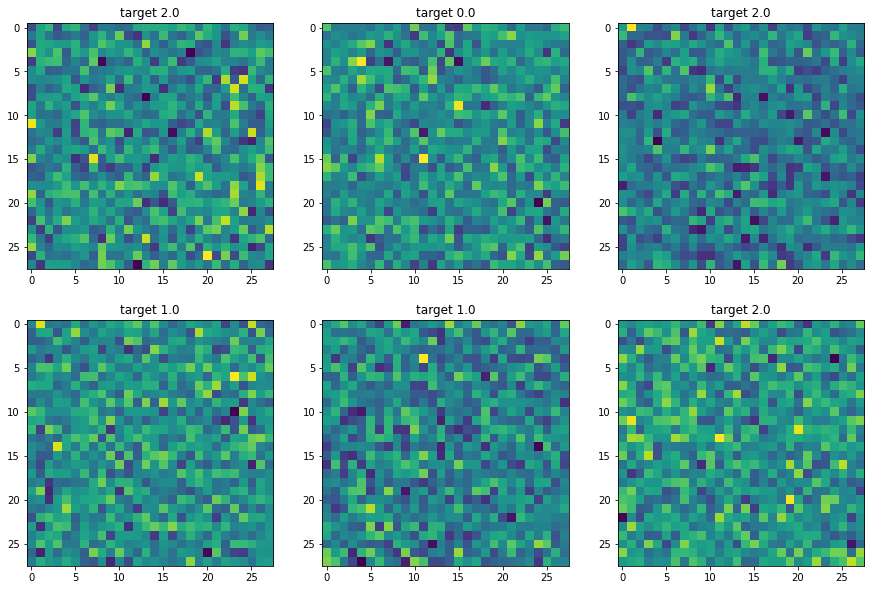

In [8]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
axs[0,0].imshow(data[0,0,:])
axs[0,0].set_title(f'target {target[0]}')
axs[0,1].imshow(data[1,0,:])
axs[0,1].set_title(f'target {target[1]}')
axs[0,2].imshow(data[2,0,:])
axs[0,2].set_title(f'target {target[2]}')
axs[1,0].imshow(data[3,0,:])
axs[1,0].set_title(f'target {target[3]}')
axs[1,1].imshow(data[4,0,:])
axs[1,1].set_title(f'target {target[4]}')
axs[1,2].imshow(data[5,0,:])
axs[1,2].set_title(f'target {target[5]}')
plt.show()

If you use MNIST

7. Configure your device. (5 points)

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'

8. Define your class called Net with the following layers (40 points)
- cnn2d layer 1 with in_channel = 1, out_channel = 10, kernel size of 5, dropout of p = 0.5 maxpool and relu as its activation function
- cnn2d layer 2 with in_channel = 10, out_channel = 20, kernel size of 5, dropout of p = 0.5 maxpool and relu as its activation function
- linear layer with output of 25
- lstm with num_layer = 2 and set hidden size to be num_classes




In [10]:
class Net(nn.Module):
    def __init__(self, lstm_layer, num_classes):
        super(Net, self).__init__()
        self.cnn1 = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.Dropout2d(p=0.5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.cnn2 = nn.Sequential(
            nn.Conv2d(10, 20, kernel_size=5),
            nn.Dropout2d(p=0.5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.fully1 = nn.Sequential(
            nn.Linear(320,25),
            nn.Sigmoid()
        )
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(1, 4, num_layers=2, batch_first=True) 

    def forward(self, x):
        x = self.cnn1(x)
        x = self.cnn2(x)

        x = x.reshape(x.size(0), -1)
        x = self.fully1(x)
        x = self.relu(x)
        x = x.reshape(x.shape[0], x.shape[1], 1)
        output, (hn, cn) = self.lstm(x)
        return hn[1,:].squeeze(0)


9. Create an model object with num_layers of lstm = 2, hidden_size and  num_classes = 4 (10 points)

If you use MNIST hidden_size and  num_classes = 10


In [11]:
model = Net(lstm_layer=2, num_classes=4).to(device)

10. Define an appropriate loss function for classification of this dataset (2.5 points)

In [12]:
criterion = nn.CrossEntropyLoss()

11. Define your optimizer as Adam with learning rate of 0.001 (5 points)

In [13]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

12. Define your train function and train your model with n_epoch = 3 (15 points)

In [14]:
n_epoch = 3
losses = []
accs = []
for i in range(n_epoch):
    print(i)
    model.train()
    epoch_loss = 0
    for data, target in train_loader:
        target = target.type(torch.LongTensor)
        if torch.cuda.is_available():
            data = data.to(device)
            target = target.to(device)
        
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    losses.append(epoch_loss)
    model.eval()

    if torch.cuda.is_available():
        Xt_train = Xt_train.to(device)
        
    out_train = model(Xt_train)
    out_classes = torch.argmax(out_train, dim=1)
    correct = [1 if out_classes[i] == yt_train[i] else 0 for i in range(yt_train.shape[0])]
    acc = sum(correct)/len(correct)
    accs.append(acc)

0
1
2


13. Plot your train losses and accuracies (10 points)

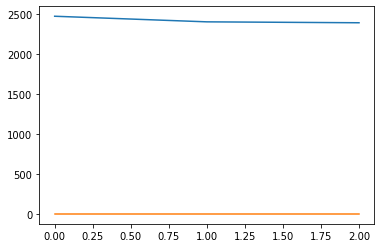

In [15]:
plt.plot(losses)
plt.plot(accs)
plt.show()

14. Evaluate your model with your test set (10 points)

In [16]:
model.eval()

if torch.cuda.is_available():
    Xt_test = Xt_test.to(device)

output = model(Xt_test)
out_classes = torch.argmax(output, dim=1)
correct = [1 if out_classes[i] == yt_test[i] else 0 for i in range(yt_test.shape[0])]
acc = sum(correct)/len(correct)

print('Accuracy:', acc)

Accuracy: 0.0
